# Visualization of inversion - Complex data

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from scipy.stats import chi2_contingency

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [4]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [5]:
mypath = 'data/flightlines_grid_2100pts_100km2_-150m/tfa_inversion/'

In [6]:
results = []
with open(mypath+'inc65_dec-40_r500_int13_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))        
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0100_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0300_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int13_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int10_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc55_dec-50_r500_int7_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc65_dec-40_r500_int6_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))
with open(mypath+'inc75_dec-30_r500_int7_z0200_dz600/inversion.pickle') as w:
        results.append(pickle.load(w))

In [7]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

In [8]:
verts_true = mfun.plot_prisms(model['prisms'])
results_verts = []
for r in results:
    results_verts.append(mfun.plot_prisms(r['prisms']))

In [9]:
xp = results[0]['x']
yp = results[0]['y']
zp = results[0]['z']

In [10]:
np.std(results[4]['residual'])/np.std(results[4]['residual']+results[4]['data_fit'])*100.

2.0881400822353435

In [11]:
np.sqrt(np.mean(results[4]['residual']**2.))

5.228002458659599

In [12]:
np.sum((results[4]['residual']**2.)/(results[4]['residual']+results[4]['data_fit']))

-920.4262564000596

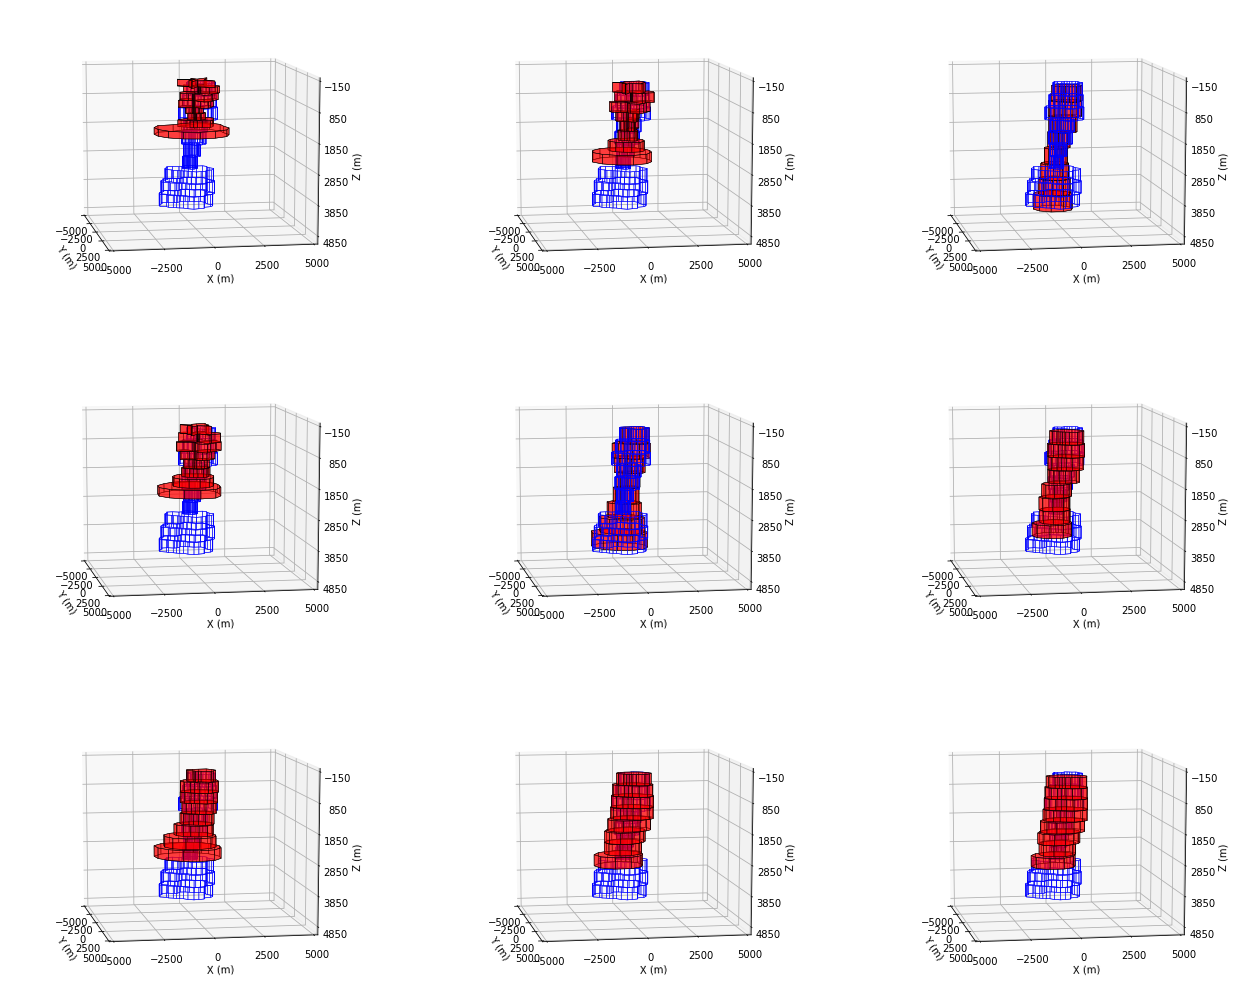

In [13]:
fig = plt.figure(figsize=(22,18))

#norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxint_true.png', dpi=300)
plt.show()

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


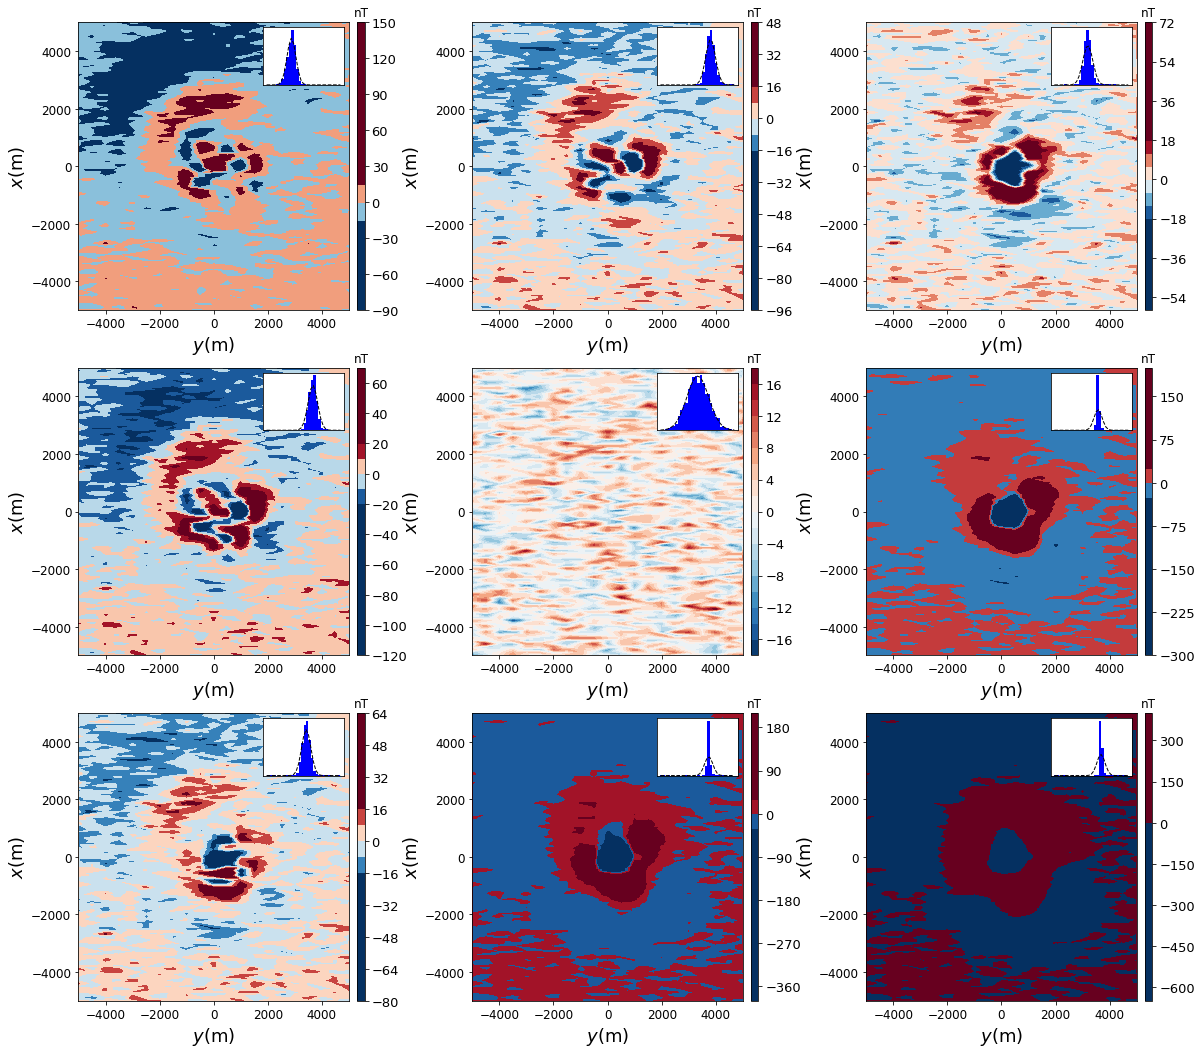

In [14]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i]['residual'])
    std = np.std(results[i]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    #plt.title('Probability')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxint_true.png', dpi=300)
plt.show()

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:94: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: scipy.stats.norm.pdf

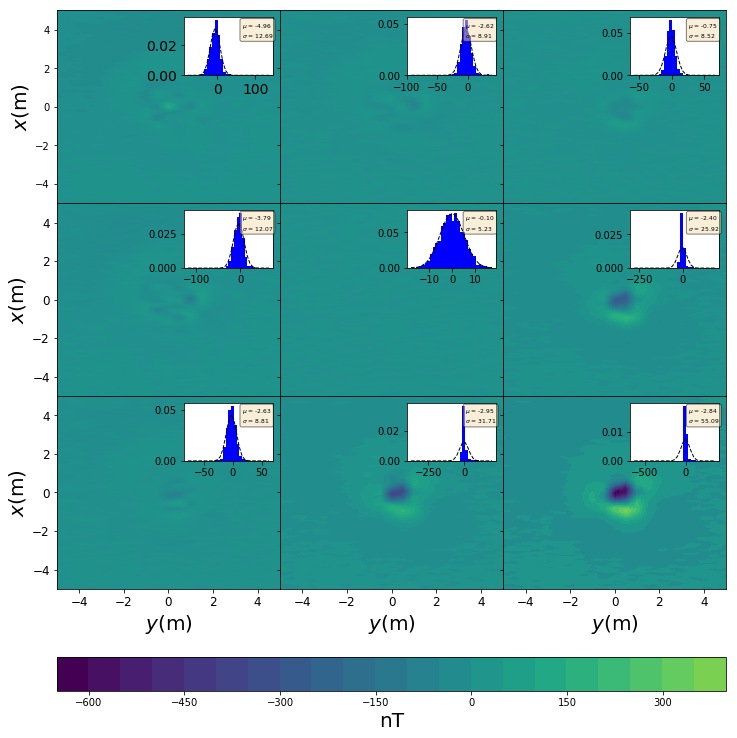

In [94]:
# norm for the residuals values
norm=mpb.colors.Normalize(vmin=np.min(results[8]['residual']), vmax=abs(np.min(results[8]['residual'])))
nbins=30
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
vmin = np.min(results[8]['residual'])
vmax = abs(np.min(results[8]['residual']))

# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = axes
# first plot
ax1.tricontourf(yp/1000., xp/1000., results[0]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_ylabel('$x$(m)', fontsize=20)
#ax1.tick_params(labelsize=12)
inset1 = inset_axes(ax1, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[0]['residual'])
std = np.std(results[0]['residual'])
n, bins, patches = plt.hist(results[0]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset1.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset1.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset1.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
inset1.tick_params(labelsize=14)
# second plot
ax2.tricontourf(yp/1000., xp/1000., results[1]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset2 = inset_axes(ax2, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[1]['residual'])
std = np.std(results[1]['residual'])
n, bins, patches = plt.hist(results[1]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset2.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset2.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset2.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# third plot
ax3.tricontourf(yp/1000., xp/1000., results[2]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset3 = inset_axes(ax3, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[2]['residual'])
std = np.std(results[2]['residual'])
n, bins, patches = plt.hist(results[2]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset3.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset3.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset3.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# fourth plot
ax4.tricontourf(yp/1000., xp/1000., results[3]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax4.set_ylabel('$x$(m)', fontsize=20)
ax4.tick_params(labelsize=12)
inset4 = inset_axes(ax4, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[3]['residual'])
std = np.std(results[3]['residual'])
n, bins, patches = plt.hist(results[3]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset4.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset4.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset4.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# fifth plot
ax5.tricontourf(yp/1000., xp/1000., results[4]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset5 = inset_axes(ax5, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[4]['residual'])
std = np.std(results[4]['residual'])
n, bins, patches = plt.hist(results[4]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset5.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset5.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset5.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# sixth plot
ax6.tricontourf(yp/1000., xp/1000., results[5]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset6 = inset_axes(ax6, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[5]['residual'])
std = np.std(results[5]['residual'])
n, bins, patches = plt.hist(results[5]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset6.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset6.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset6.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
plt.savefig(mypath+'teste.png', dpi=300)
# seventh plot
ax7.tricontourf(yp/1000., xp/1000., results[6]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax7.set_ylabel('$x$(m)', fontsize=20)
ax7.set_xlabel('$y$(m)', fontsize=20)
ax7.tick_params(labelsize=12)
inset7 = inset_axes(ax7, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[6]['residual'])
std = np.std(results[6]['residual'])
n, bins, patches = plt.hist(results[6]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset7.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset7.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset7.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
plt.savefig(mypath+'teste.png', dpi=300)
# eighth plot
ax8.tricontourf(yp/1000., xp/1000., results[7]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax8.set_xlabel('$y$(m)', fontsize=20)
ax8.tick_params(labelsize=12)
inset8 = inset_axes(ax8, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[7]['residual'])
std = np.std(results[7]['residual'])
n, bins, patches = plt.hist(results[7]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset8.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset8.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset8.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# nineth plot
cb = ax9.tricontourf(yp/1000., xp/1000., results[8]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax9.set_xlabel('$y$(m)', fontsize=20)
ax9.tick_params(labelsize=12)
inset9 = inset_axes(ax9, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[8]['residual'])
std = np.std(results[8]['residual'])
n, bins, patches = plt.hist(results[8]['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
inset9.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset9.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset9.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)

cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)

plt.savefig(mypath+'teste.png', dpi=300)
plt.show()

In [74]:
np.min(results[8]['residual'])

-628.2016158795639

In [ ]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+9], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i+9]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxdir_true.png', dpi=300)
plt.show()

In [ ]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+9]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+9]['residual'])
    std = np.std(results[i+9]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+9]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxdir_true.png', dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+18], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    ax.tricontourf(xp, yp, results[i+18]['residual'],
                    zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_dirxint_true.png', dpi=300)
plt.show()

In [ ]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+18]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+18]['residual'])
    std = np.std(results[i+18]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+18]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_dirxint_true.png', dpi=300)
plt.show()